In [1]:
import pandas as pd
import sklearn.metrics as m
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [2]:
dataset = pd.read_csv('Dataset-Deseased.csv', delimiter= ';')
dataset

FileNotFoundError: ignored

In [3]:
# run this line if you are using google colab for cloud data mining

url = 'https://drive.google.com/file/d/1mbk6z23NUhca_u2MzBwJFbPEVh3wOlG2/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

dataset = pd.read_csv(path, delimiter = ';')
dataset

,gender,age,eritrosit,hematokrit,hemoglobin,hermch,khermchc,leukosit,trombosit,deceased
0,0,62,"3,14","27,9","9,3","29,6","33,3",14630,291,0
1,1,48,305,257,85,279,331,25400,200,0
2,0,68,310,249,86,277,345,24690,177,0
3,0,62,"4,74","38,3","12,6","26,6","32,9",10700,263,0
4,1,58,297,268,92,310,343,10370,217,0
...,...,...,...,...,...,...,...,...,...,...
4686,1,60,"3,85","33,7","11,2","29,1","33,2",10200,314,0
4687,1,56,"4,53","39,5","13,6",30,"34,4",16270,341,0
4688,1,58,"6,07","38,7","11,8","19,4","30,5",10670,224,0
4689,1,42,"4,44","35,3",12,27,34,7940,202,0


In [4]:
dataset = dataset.replace(',', '.', regex = True)

In [5]:
x = dataset.drop('deceased', axis = 1)
y = dataset.deceased

In [6]:
X_train, X_test, Y_train, Y_test =  train_test_split(x, y,train_size=0.5)

In [7]:
MLPC = MLPClassifier(solver='adam', max_iter=300)

In [8]:
MLPC.fit(X_train, Y_train)

MLPClassifier(max_iter=300)

In [14]:
prediction =MLPC.predict(X_train)

print("Confusion matrix for train set")
print(m.confusion_matrix(Y_train, prediction))
print("Accuracy",m.accuracy_score(Y_train,prediction))
print("precision = ", m.precision_score(Y_train, prediction, average="weighted", zero_division = 0))
print("F Measure",m.f1_score(Y_train,prediction))
print("Recall",m.recall_score(Y_train,prediction), "\n")


predictions = MLPC.predict(X_test)
print("Confusion matrix for test set")
print(m.confusion_matrix(Y_test, predictions))
print("Accuracy",m.accuracy_score(Y_test,predictions))
print("Precision",m.precision_score(Y_test,predictions, average='weighted', zero_division = 0))
print("F Measure",m.f1_score(Y_test,predictions))
print("Recall",m.recall_score(Y_test,predictions))

Confusion matrix for train set
[[2240    0]
 [ 104    1]]
Accuracy 0.9556503198294243
precision =  0.9576180530793134
F Measure 0.01886792452830189
Recall 0.009523809523809525 

Confusion matrix for test set
[[2238    0]
 [ 108    0]]
Accuracy 0.9539641943734015
Precision 0.9100476841464931
F Measure 0.0
Recall 0.0


Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      2238
           1       0.00      0.00      0.00       108

    accuracy                           0.95      2346
   macro avg       0.48      0.50      0.49      2346
weighted avg       0.91      0.95      0.93      2346



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


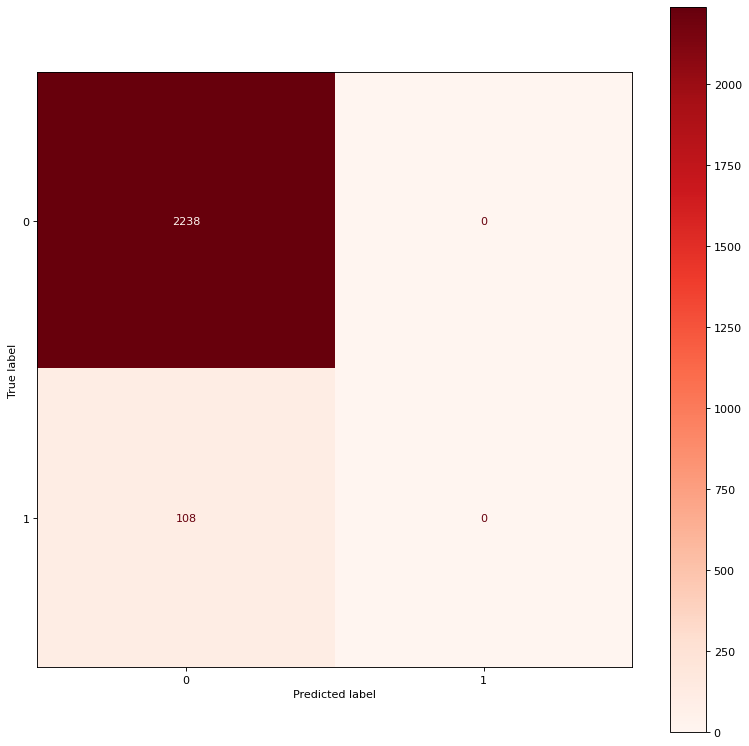

In [15]:
# Classification Report matrix for miss Medi
predictions = MLPC.predict(X_test)

print('Classification Report')
cr = m.classification_report(Y_test, predictions)
print(cr)

# ploting confussion matrix
fig, ax = plt.subplots(ncols= 1, nrows=1, figsize = (12,12), dpi = 80)
cm = m.confusion_matrix(Y_test, predictions)
m.ConfusionMatrixDisplay(cm).plot(ax = ax, cmap = 'Reds')

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


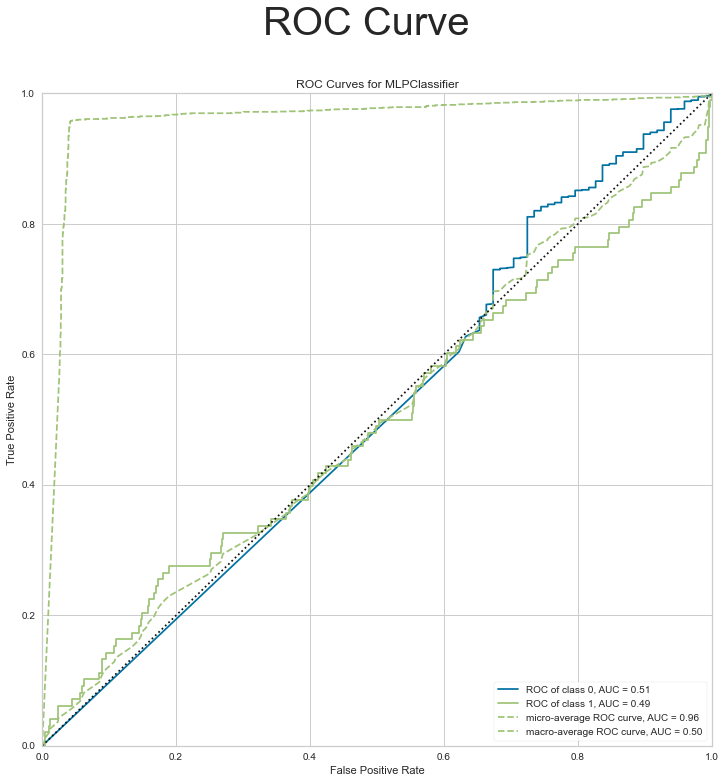

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc

fig, ax = plt.subplots(nrows = 1,ncols = 1,figsize = (12,12));
fig.suptitle('ROC Curve', fontsize = 40)
curve = roc_auc(MLPC, X_train, Y_train, X_test = X_test, y_test = Y_test, classes=[0,1], ax = ax)
fig.savefig('MLPC-deceased-ROC-AUC.pdf')